# Multiple Linear Regression


##### Multiple Linear Regression:

\begin{align}
{y}= b_0 + b_1x_1 + b_2x_2 + ... + b_nx_n
\end{align}


In [1]:
%matplotlib inline 
import pandas
import csv
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
df = pandas.DataFrame.from_csv('data/50-Startups.csv', index_col=None)
df[:5]

C:\Users\Diogo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,California,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,California,166187.94


#### Variables

- Profit: dependent variable (y)
- R&D Spend, Administration, Marketing Spend: numeric independent variables (x)
- State: categorical independet variable (x)

In [3]:
df_y = df['Profit']
df_x = df.drop(['Profit'], axis = 1)

Create dummy variable for the categorical variable:

In [4]:
dummy = pandas.get_dummies(df_x['State'])
df_x = dummy.join(df_x)
df_x[:5]

,California,New York,R&D Spend,Administration,Marketing Spend,State
0,0,1,165349.20,136897.80,471784.10,New York
1,1,0,162597.70,151377.59,443898.53,California
2,1,0,153441.51,101145.55,407934.54,California
3,0,1,144372.41,118671.85,383199.62,New York
4,1,0,142107.34,91391.77,366168.42,California


Only one dummy variable should be used to avoid the "dummy variable trap":

In [5]:
df_x = df_x.drop(['California', 'State'], axis =1)
df_x[:5]

,New York,R&D Spend,Administration,Marketing Spend
0,1,165349.20,136897.80,471784.10
1,0,162597.70,151377.59,443898.53
2,0,153441.51,101145.55,407934.54
3,1,144372.41,118671.85,383199.62
4,0,142107.34,91391.77,366168.42


#### Backward Elimination 

Use Backward Elimination to find the most important features.

Steps:

1. Select a significance level (SL) to keep the variables in the model.
2. Fit the full model with all possible predictors.
3. Consider the predictor with the higher p-value. If p-value > SL, go to step 4. Otherwise go to step 6.
4. Remove the predictor.
5. Fit model without this variable.
6. The model is ready

   - Apply ordinary least squares (OLS) Regression
   
SL = 0.05

Add a constant \begin{align} b_0 \end{align} to the model:

In [6]:
df_x = sm.add_constant(df_x)
df_x[:2]

C:\Users\Diogo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,New York,R&D Spend,Administration,Marketing Spend
0,1.0,1,165349.2,136897.80,471784.10
1,1.0,0,162597.7,151377.59,443898.53


Create a model with all variables:

In [7]:
model1 = sm.OLS(df_y, df_x).fit()
print (model1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     218.4
Date:                Fri, 26 Jun 2020   Prob (F-statistic):           7.53e-29
Time:                        19:14:37   Log-Likelihood:                -525.25
No. Observations:                  50   AIC:                             1060.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.042e+04   6653.545     

As one can observe, the variable with the largest p-value is the "Administration" -> p-value = 0.651 >> 0.05

Let's see the relationship of this variable with the "Profit":

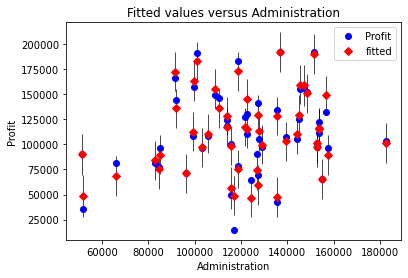

In [8]:
fig = sm.graphics.plot_fit(model1, 3)

It does not seem to exist a relationship between Profit and Administration. 

Let's discard this variable:

In [9]:
model2 = sm.OLS(df_y, df_x.drop(['Administration'], axis = 1)).fit()
print (model2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.2
Date:                Fri, 26 Jun 2020   Prob (F-statistic):           4.44e-30
Time:                        19:14:38   Log-Likelihood:                -525.36
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.772e+04   3018.340     

Now, the variable with the highest p-value is "New York" that has a p-value of 0.577, which is much grater than the significance level 0.05. 

Let's see the relationship of this variable with the Profit:

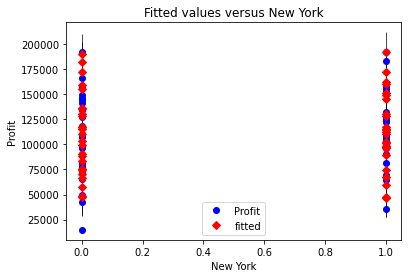

In [10]:
fig = sm.graphics.plot_fit(model2, 1)

Being New York (1) or California (0) does not seem to affect the Profit. So we can conclude that the variable "New York" does not bring any value to the model and it can be discarded.

In [11]:
model3 = sm.OLS(df_y, df_x.drop(['Administration', 'New York'], axis = 1)).fit()
print (model3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Fri, 26 Jun 2020   Prob (F-statistic):           2.16e-31
Time:                        19:14:38   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.698e+04   2689.933     

Now, the variable with the highest p-value is "Marketing Spend", but the value "0.06" is very close to the significance level "0.05".

Let's see the relationship with "Profit":

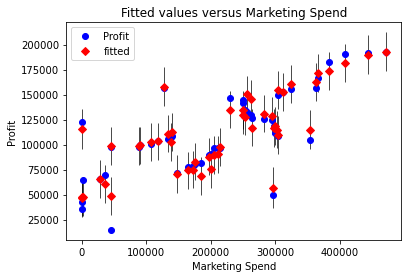

In [12]:
fig = sm.graphics.plot_fit(model3, 2)

It seems to exist some kind of relationship between the two variables.

Let's see what happens if this variable is not included in the model:

In [13]:
model4 = sm.OLS(df_y, df_x.drop(['Administration', 'New York', 'Marketing Spend'], axis = 1)).fit()
print (model4.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Fri, 26 Jun 2020   Prob (F-statistic):           3.50e-32
Time:                        19:14:38   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.0

The Adjusted R-squared in the model3, that contains the "R&D Spend" and the "Marketing Spend" variables is: 0.948

The Adjusted R-squared in the model4, that contains only the "R&D Spend" variable is: 0.945

Hence, when both variables are used, the value of the Adjusted R-squared is larger which means the model is better. 
So the "Marketing Spend" should be mantained in the model.